[[ 6400. -3200.     0. ...     0.     0. -3200.]
 [-3200.  6400. -3200. ...     0.     0.     0.]
 [    0. -3200.  6400. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...  6400. -3200.     0.]
 [    0.     0.     0. ... -3200.  6400. -3200.]
 [-3200.     0.     0. ...     0. -3200.  6400.]]


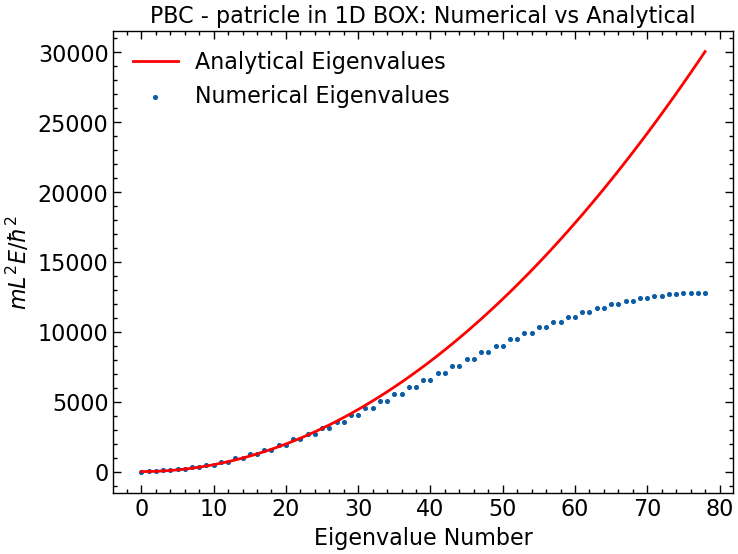

In [ ]:
#Energy is quantized
#System :: Potential
#we always try to make our equations dimensionless for computational physics

#We see as we discretized the Schrodinger Eqn(SE) we get :: [H]{psi} = E {psi} ; here E is called energy eigenvalues 
#here [H] is not a tridiagonal matrix anymore since i am incorporating PBC!!!
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
plt.style.use(['science' , 'notebook'])

# well truly in SE , N goes go to infinity but here we will get a good approximation with some large finite N

# defining N and dy
N = 80

dy = 1/N

#since Vi = V(yi):: y = [array]
y = np.linspace(0,1,N+1)           #N+1 since psi0 to psiN

#Defining potential :: mL**2 V
def mL2V(y):
    return 0*y                     # 1000 :: L is big enough so as to think this problem as an unbounded potn

#Defining [H] :: a tridiagonal matrix (whose eigenvalues are to be calculated)

main_diag = 1/dy**2 + mL2V(y)[1:-1]
off_diags = -1/(2*dy**2)*np.ones(len(main_diag)-1)

#EigenENERGIES :: eigh

# Define full Hamiltonian matrix H (not just diagonals)
H = np.diag(main_diag) + np.diag(off_diags, 1) + np.diag(off_diags, -1)

# PBC: set corner elements
H[0, -1] = H[-1, 0] = -1 / (2 * dy**2)     

w, v = eigh(H)
eigenValues = w 
eigenStates = v.T

# for i in range(1):  
#     plt.plot(eigenStates[i]**2 , label = "1st Eigenvalue") 
# #plt.plot(eigenStates[25]**2  , label = "25th Eigenvalue")
# plt.xlabel('Lattice Site Number')
# plt.ylabel('probability')
# plt.legend(loc = "lower right" , fontsize = 7 , ncol = 2)
# plt.show()

# print(w)

plt.plot(np.arange(0,N-1,1), (np.pi**2 *(np.arange(N-1))**2)/2 , '-', label="Analytical Eigenvalues", color='red')
plt.scatter(np.arange(0, N-1, 1), w[:N-1], marker='o', s = 7, label="Numerical Eigenvalues")
plt.title("PBC - patricle in 1D BOX: Numerical vs Analytical")
plt.ylabel('$mL^2E/\hbar^2$')
plt.xlabel("Eigenvalue Number")
plt.legend()
plt.show()
